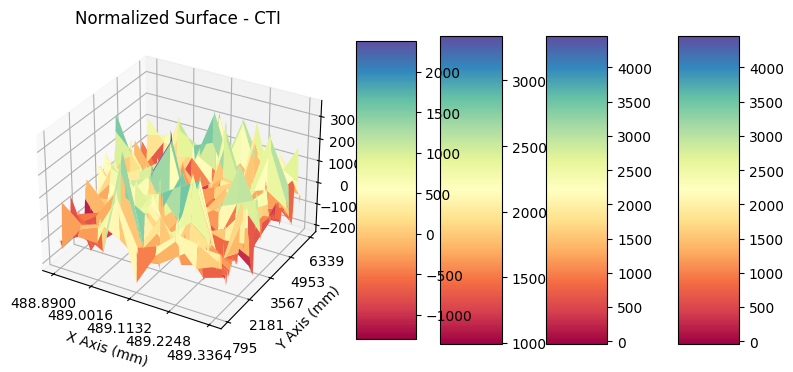

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Load Excel file and get sheet names
file_path = r'C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\2Full_Surface_Profilometry_Organized_Samples_for_Program.xlsx'
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names

# Coordinates and resolutions
x_coord = 488.89
y_coord = 795.28
x_resolution = 0.049603
y_resolution = 5.5

def normalize_surface(Z, X, Y):
    x_flat = X.flatten()
    y_flat = Y.flatten()
    z_flat = Z.flatten()
    
    A = np.c_[x_flat, y_flat, np.ones_like(x_flat)]
    C, _, _, _ = np.linalg.lstsq(A, z_flat, rcond=None)
    
    Z_fit = C[0] * X + C[1] * Y + C[2]
    Z_normalized = Z - Z_fit
    
    return Z_fit, Z_normalized

def create_animation(sheet_name):
    # Load data from the current sheet
    df = pd.read_excel(file_path, sheet_name=sheet_name, index_col=0)
    Z = df.values

    # Create meshgrid for X and Y based on the shape of Z
    x_points = Z.shape[1]
    y_points = Z.shape[0]
    x_values = np.linspace(x_coord, x_coord + x_points * x_resolution, x_points)
    y_values = np.linspace(y_coord, y_coord + y_points * y_resolution, y_points)
    X, Y = np.meshgrid(x_values, y_values)

    # Normalize the Z values
    Z_fit, Z_normalized = normalize_surface(Z, X, Y)

    # Create the figure and 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    def update(frame):
        ax.clear()
        if frame == 0:
            surf = ax.plot_surface(X, Y, Z, cmap='Spectral')
            ax.set_title(f"Original Surface - {sheet_name}")
        elif frame == 1:
            surf = ax.plot_surface(X, Y, Z_fit, cmap='Spectral')
            ax.set_title(f"Fitted Plane - {sheet_name}")
        else:
            surf = ax.plot_surface(X, Y, Z_normalized, cmap='Spectral')
            ax.set_title(f"Normalized Surface - {sheet_name}")
        
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
        ax.set_xlabel('X Axis (mm)')
        ax.set_ylabel('Y Axis (mm)')
        ax.set_zlabel('Z Values')
        ax.set_xticks(np.linspace(x_coord, x_coord + x_points * x_resolution, 5))
        ax.set_yticks(np.linspace(y_coord, y_coord + y_points * y_resolution, 5))

    ani = FuncAnimation(fig, update, frames=[0, 1, 2], repeat=False)

    # Save the animation as a GIF file using PillowWriter with lower fps for slower animation
    writer = PillowWriter(fps=0.2)  # Lower fps to make the animation slower
    ani.save(f"{sheet_name}_normalization_animation.gif", writer=writer)

# Run the animation for the first sheet as an example
create_animation(sheet_names[0])
